# Experimenting with models - Face Mask Detection
## Description
description here

## Setup

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import pathlib

# sets the path to the home directory of this repository so other modules can be imported. 
root_path = os.path.split(os.path.split(os.getcwd())[0])[0]
assert root_path.endswith("mask-detection"), "The root path does not end with mask-detection: " + root_path 
sys.path.insert(0, root_path)
path = pathlib.Path(root_path + '/data/facemask-dataset')

# set the seed for reproducible results.
np.random.seed(0)
tf.random.set_seed(0)

# GPU settings
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.3.0


In [19]:
from datasets.facemask_dataset import FacemaskDataset
batch_size = 64
train_percentage = 0.6
validation_percentage = 0.2
test_percentage = 0.2
ds = FacemaskDataset(path, batch_size, 200, 200, True, train_percentage, validation_percentage, test_percentage)

train: 36 validation: 12 test: 12


## Building models

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(num_classes)
])

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Add a callback for earlystopping
callbacks = [EarlyStopping(patience=10, monitor='val_loss')]

history = model.fit(
    x=ds.train_ds,
    validation_data=ds.val_ds,
    epochs=100,
    validation_steps=ds.val_size,
    steps_per_epoch=ds.train_size,
    callbacks=callbacks
)

Epoch 1/100
36/36 [==============================] - 2s 45ms/step - loss: 0.6922 - acc: 0.5369 - val_loss: 0.6915 - val_acc: 0.6693
Epoch 2/100
36/36 [==============================] - 2s 42ms/step - loss: 0.6865 - acc: 0.5664 - val_loss: 0.6887 - val_acc: 0.4857
Epoch 3/100
36/36 [==============================] - 1s 41ms/step - loss: 0.6674 - acc: 0.6415 - val_loss: 0.6586 - val_acc: 0.6836
Epoch 4/100
36/36 [==============================] - 1s 41ms/step - loss: 0.6321 - acc: 0.6780 - val_loss: 0.6228 - val_acc: 0.6940
Epoch 5/100
36/36 [==============================] - 1s 41ms/step - loss: 0.5919 - acc: 0.7105 - val_loss: 0.5848 - val_acc: 0.7083
Epoch 6/100
36/36 [==============================] - 2s 42ms/step - loss: 0.5480 - acc: 0.7422 - val_loss: 0.5480 - val_acc: 0.7109
Epoch 7/100
36/36 [==============================] - 1s 41ms/step - loss: 0.4958 - acc: 0.7713 - val_loss: 0.4685 - val_acc: 0.7865
Epoch 8/100
36/36 [==============================] - 1s 41ms/step - loss: 0.

36/36 [==============================] - 2s 43ms/step - loss: 0.2016 - acc: 0.9175 - val_loss: 0.2064 - val_acc: 0.9180
Epoch 63/100
36/36 [==============================] - 2s 42ms/step - loss: 0.2048 - acc: 0.9206 - val_loss: 0.2026 - val_acc: 0.9206
Epoch 64/100
36/36 [==============================] - 2s 42ms/step - loss: 0.1990 - acc: 0.9210 - val_loss: 0.2034 - val_acc: 0.9180
Epoch 65/100
36/36 [==============================] - 2s 42ms/step - loss: 0.2009 - acc: 0.9210 - val_loss: 0.2005 - val_acc: 0.9219
Epoch 66/100
36/36 [==============================] - 2s 44ms/step - loss: 0.1955 - acc: 0.9188 - val_loss: 0.1987 - val_acc: 0.9206
Epoch 67/100
36/36 [==============================] - 2s 44ms/step - loss: 0.2009 - acc: 0.9184 - val_loss: 0.1983 - val_acc: 0.9219
Epoch 68/100
36/36 [==============================] - 2s 44ms/step - loss: 0.1913 - acc: 0.9258 - val_loss: 0.1974 - val_acc: 0.9232
Epoch 69/100
36/36 [==============================] - 1s 40ms/step - loss: 0.1950 

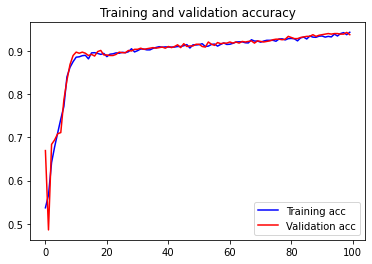

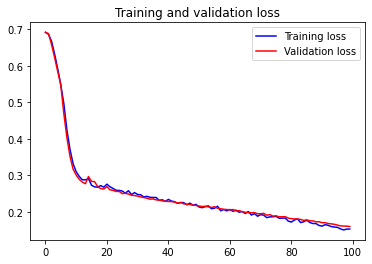

In [28]:
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
visualize_results(history)